# pyABF-APisolation - Code Walkthrough

pyABF-APisolation, is a simplistic module built to quickly extract action potentials and their raw features from abf files.   This module is built on top of swhardens excellent 'pyABF'. Features are defined by their values located in the Allen Institute's electrophysiology white papers

The goal of this document is to show the exactly how the code goes about extracting the features.

### Step 0: import the dependencies, import the ABF

To begin with we need to import the dependencies. This code utilises numpy, and pandas for data storage and output. Additionally, we utilise the previously written abfderivative tools found here: https://github.com/smestern/abfderivative.

In [2]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from abfderivative import *
from nuactionpotential import *
import pyabf
from pyabf.tools import *
from pyabf import filter
import os
import pandas as pd
import statistics

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pyabf\tools\__init__.py:8: UserWarning: All pyabf.tools modules are experimental (APIs may change)
  warnings.warn("All pyabf.tools modules are experimental (APIs may change)")


Now we simply import our ABF file

In [3]:
abf = pyabf.ABF('./processed/1971003-p.abf')

After importing the ABF file, we can take a look to ensure its working.

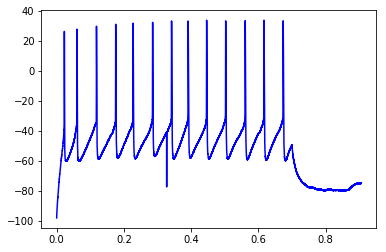

In [4]:
abf.setSweep(4) #Set to sweep number 4
plt.plot(abf.sweepX, abf.sweepY, 'b-') #plot our sweep

After importing an ABF file, we can simply call apisolate. This is the function you will want to use most often. Ap isolate returns both a feature array and the raw traces for all the action potentials found in a file. 

0
%5 threhold avg: 14373.779296876584
Ap count: 1
1
%5 threhold avg: 13122.558593751448
Ap count: 4
2
%5 threhold avg: 11298.285590278416
Ap count: 13
3
%5 threhold avg: 11102.294921872028
Ap count: 23
4
%5 threhold avg: 10453.444260817821
Ap count: 36
5
%5 threhold avg: 10149.002075196082
Ap count: 52
6
%5 threhold avg: 9719.04553865222
Ap count: 71
7
%5 threhold avg: 9431.384858631
Ap count: 92
8
%5 threhold avg: 10242.919921873214
Ap count: 117
9
%5 threhold avg: 8829.345703125266
Ap count: 142
feattag.csv saved


,Sweep,Start Time,End Time,ISI,5% Threshold,mV at Threshold,AP Peak (mV),Ap peak (S),AP fast trough (mV),AP fast trough time (S),AP slow trough (mV),AP slow trough time (S),AP slow trough time ratio,AP height,AP Full width (S),AP Upstroke (mV/mS),AP Upstroke time (S),AP downstroke (mV/mS),AP Downstroke time (S),Upstroke / Downstroke Ratio
0,0.0,0.09860,0.01050,0.80665,14373.779297,-37.170410,28.991699,0.00050,-65.734863,0.00545,-68.328857,0.01030,0.980,94.726562,0.00095,287475.585938,0.00025,-100708.007813,0.00100,-2.854545
1,1.0,0.04685,0.01055,0.10670,13122.558594,-45.043945,27.008057,0.00055,-63.720703,0.00550,-65.307617,0.01045,0.990,90.728760,0.00080,285034.179688,0.00030,-114135.742187,0.00095,-2.497326
2,1.0,0.15355,0.01060,0.20930,13122.558594,-35.156250,30.242920,0.00060,-62.591553,0.00555,-64.636230,0.01010,0.950,92.834473,0.00105,253906.250000,0.00030,-82397.460938,0.00110,-3.081481
3,1.0,0.36285,0.01065,0.54240,13122.558594,-34.332275,33.782959,0.00065,-59.509277,0.00545,-61.767578,0.00985,0.920,93.292236,0.00130,248413.085938,0.00030,-70190.429688,0.00150,-3.539130
4,2.0,0.03480,0.01055,0.05955,11298.285590,-37.200928,27.221680,0.00055,-62.774658,0.00545,-63.568115,0.00810,0.755,89.996338,0.00085,278320.312500,0.00030,-108642.578125,0.00095,-2.561798


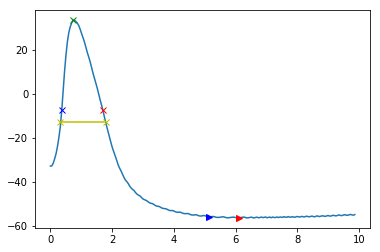

In [5]:
aparray, featarray, abf = apisolate(abf, 0, 'tag', False, True, plot=1)
display(featarray.head())

As you can see, apisolate returns a reasonably complete feature array. Now lets look at how it determines these values.

### Step 1: Isolate the raw traces

First, Apisolate calls appreprocess. This function serves to isolate the 'raw' traces, as well as some feature data.  
appreprocess begins by constructing arrays to fill.